# Presentation - Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

import datashader as ds
import datashader.transfer_functions as tf

%matplotlib inline
sns.set(color_codes=True)

In [2]:
from matplotlib import rcParams, colors
# rcParams['grid.linewidth'] = 0
rcParams['font.size'] = 10

## Load Data

In [3]:
path = '../datasets/preprocessed/'
stim   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)
stim.head(3)

Frame      Time  visible  speed  session_id
index                                             
0          0  0.000000        0    0.0           0
1          0  0.000000        0    0.0           0
2          1  0.004167        0    0.0           0

In [4]:
rat = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
rat.head(3)

Frame      Time     X_Pos     Y_Pos     Z_Pos     X_Ori     Y_Ori  \
index                                                                      
20        20  0.083333 -0.056363  0.072346 -0.049635 -0.630098 -0.768520   
21        21  0.087500 -0.056324  0.072395 -0.049580 -0.630137 -0.768168   
22        22  0.091667 -0.056285  0.072442 -0.049525 -0.630120 -0.767833   

          Z_Ori  session_id  Filtered  
index                                  
20     0.018050           0         0  
21     0.025253           0         0  
22     0.032642           0         0

In [5]:
print(len(rat))
print(len(rat[rat.Filtered==1]))

1280350
765149


In [6]:
rat_v = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
rat_v.head(3)

Frame      Time     X_Pos     Y_Pos     Z_Pos     X_Ori     Y_Ori  \
index                                                                      
1         21  0.087500 -0.056324  0.072395 -0.049580 -0.630137 -0.768168   
2         22  0.091667 -0.056285  0.072442 -0.049525 -0.630120 -0.767833   
3         23  0.095833 -0.056241  0.072488 -0.049468 -0.629928 -0.767622   

          Z_Ori  session_id  Filtered      Theta           U  U_var  
index                                                                
1      0.025253           0         0 -87.705039  156.977244    NaN  
2      0.032642           0         0 -87.034598  160.892886    NaN  
3      0.040258           0         0 -86.343297  165.938758    NaN

In [7]:
SRB = pd.read_hdf(path+'SRB.h5', 'Rat_Behavior').set_index('index')
SRB.head(3)

Frame        Time     X_Pos     Y_Pos     Z_Pos     X_Ori     Y_Ori  \
index                                                                        
0      37440  156.000010  0.093441  0.165644 -0.054762  0.879993  0.424692   
1      37441  156.004177  0.093453  0.165645 -0.054730  0.880194  0.424575   
2      37442  156.008343  0.093482  0.165663 -0.054691  0.880144  0.424881   

          Z_Ori  session_id  Filtered       Theta         U     U_var  \
index                                                                   
0     -0.212234           0         0  103.559478 -9.052831  2.093787   
1     -0.211656           0         0  103.520946 -9.246986  2.068201   
2     -0.211242           0         0  103.496176 -5.945695  2.043517   

       visible  speed  SRB_id  
index                          
0            1  -14.0       0  
1            1  -14.0       0  
2            1  -14.0       0

### Merge Data for SRB

In [8]:
rat_vs = pd.merge(rat_v, stim, on=['Frame', 'Time', 'session_id'])
rat_vs.head(3)

Frame      Time     X_Pos     Y_Pos     Z_Pos     X_Ori     Y_Ori  \
0     21  0.087500 -0.056324  0.072395 -0.049580 -0.630137 -0.768168   
1     22  0.091667 -0.056285  0.072442 -0.049525 -0.630120 -0.767833   
2     23  0.095833 -0.056241  0.072488 -0.049468 -0.629928 -0.767622   

      Z_Ori  session_id  Filtered      Theta           U  U_var  visible  \
0  0.025253           0         0 -87.705039  156.977244    NaN        0   
1  0.032642           0         0 -87.034598  160.892886    NaN        0   
2  0.040258           0         0 -86.343297  165.938758    NaN        0   

   speed  
0    0.0  
1    0.0  
2    0.0

## Data Visualization

### Position Distribution

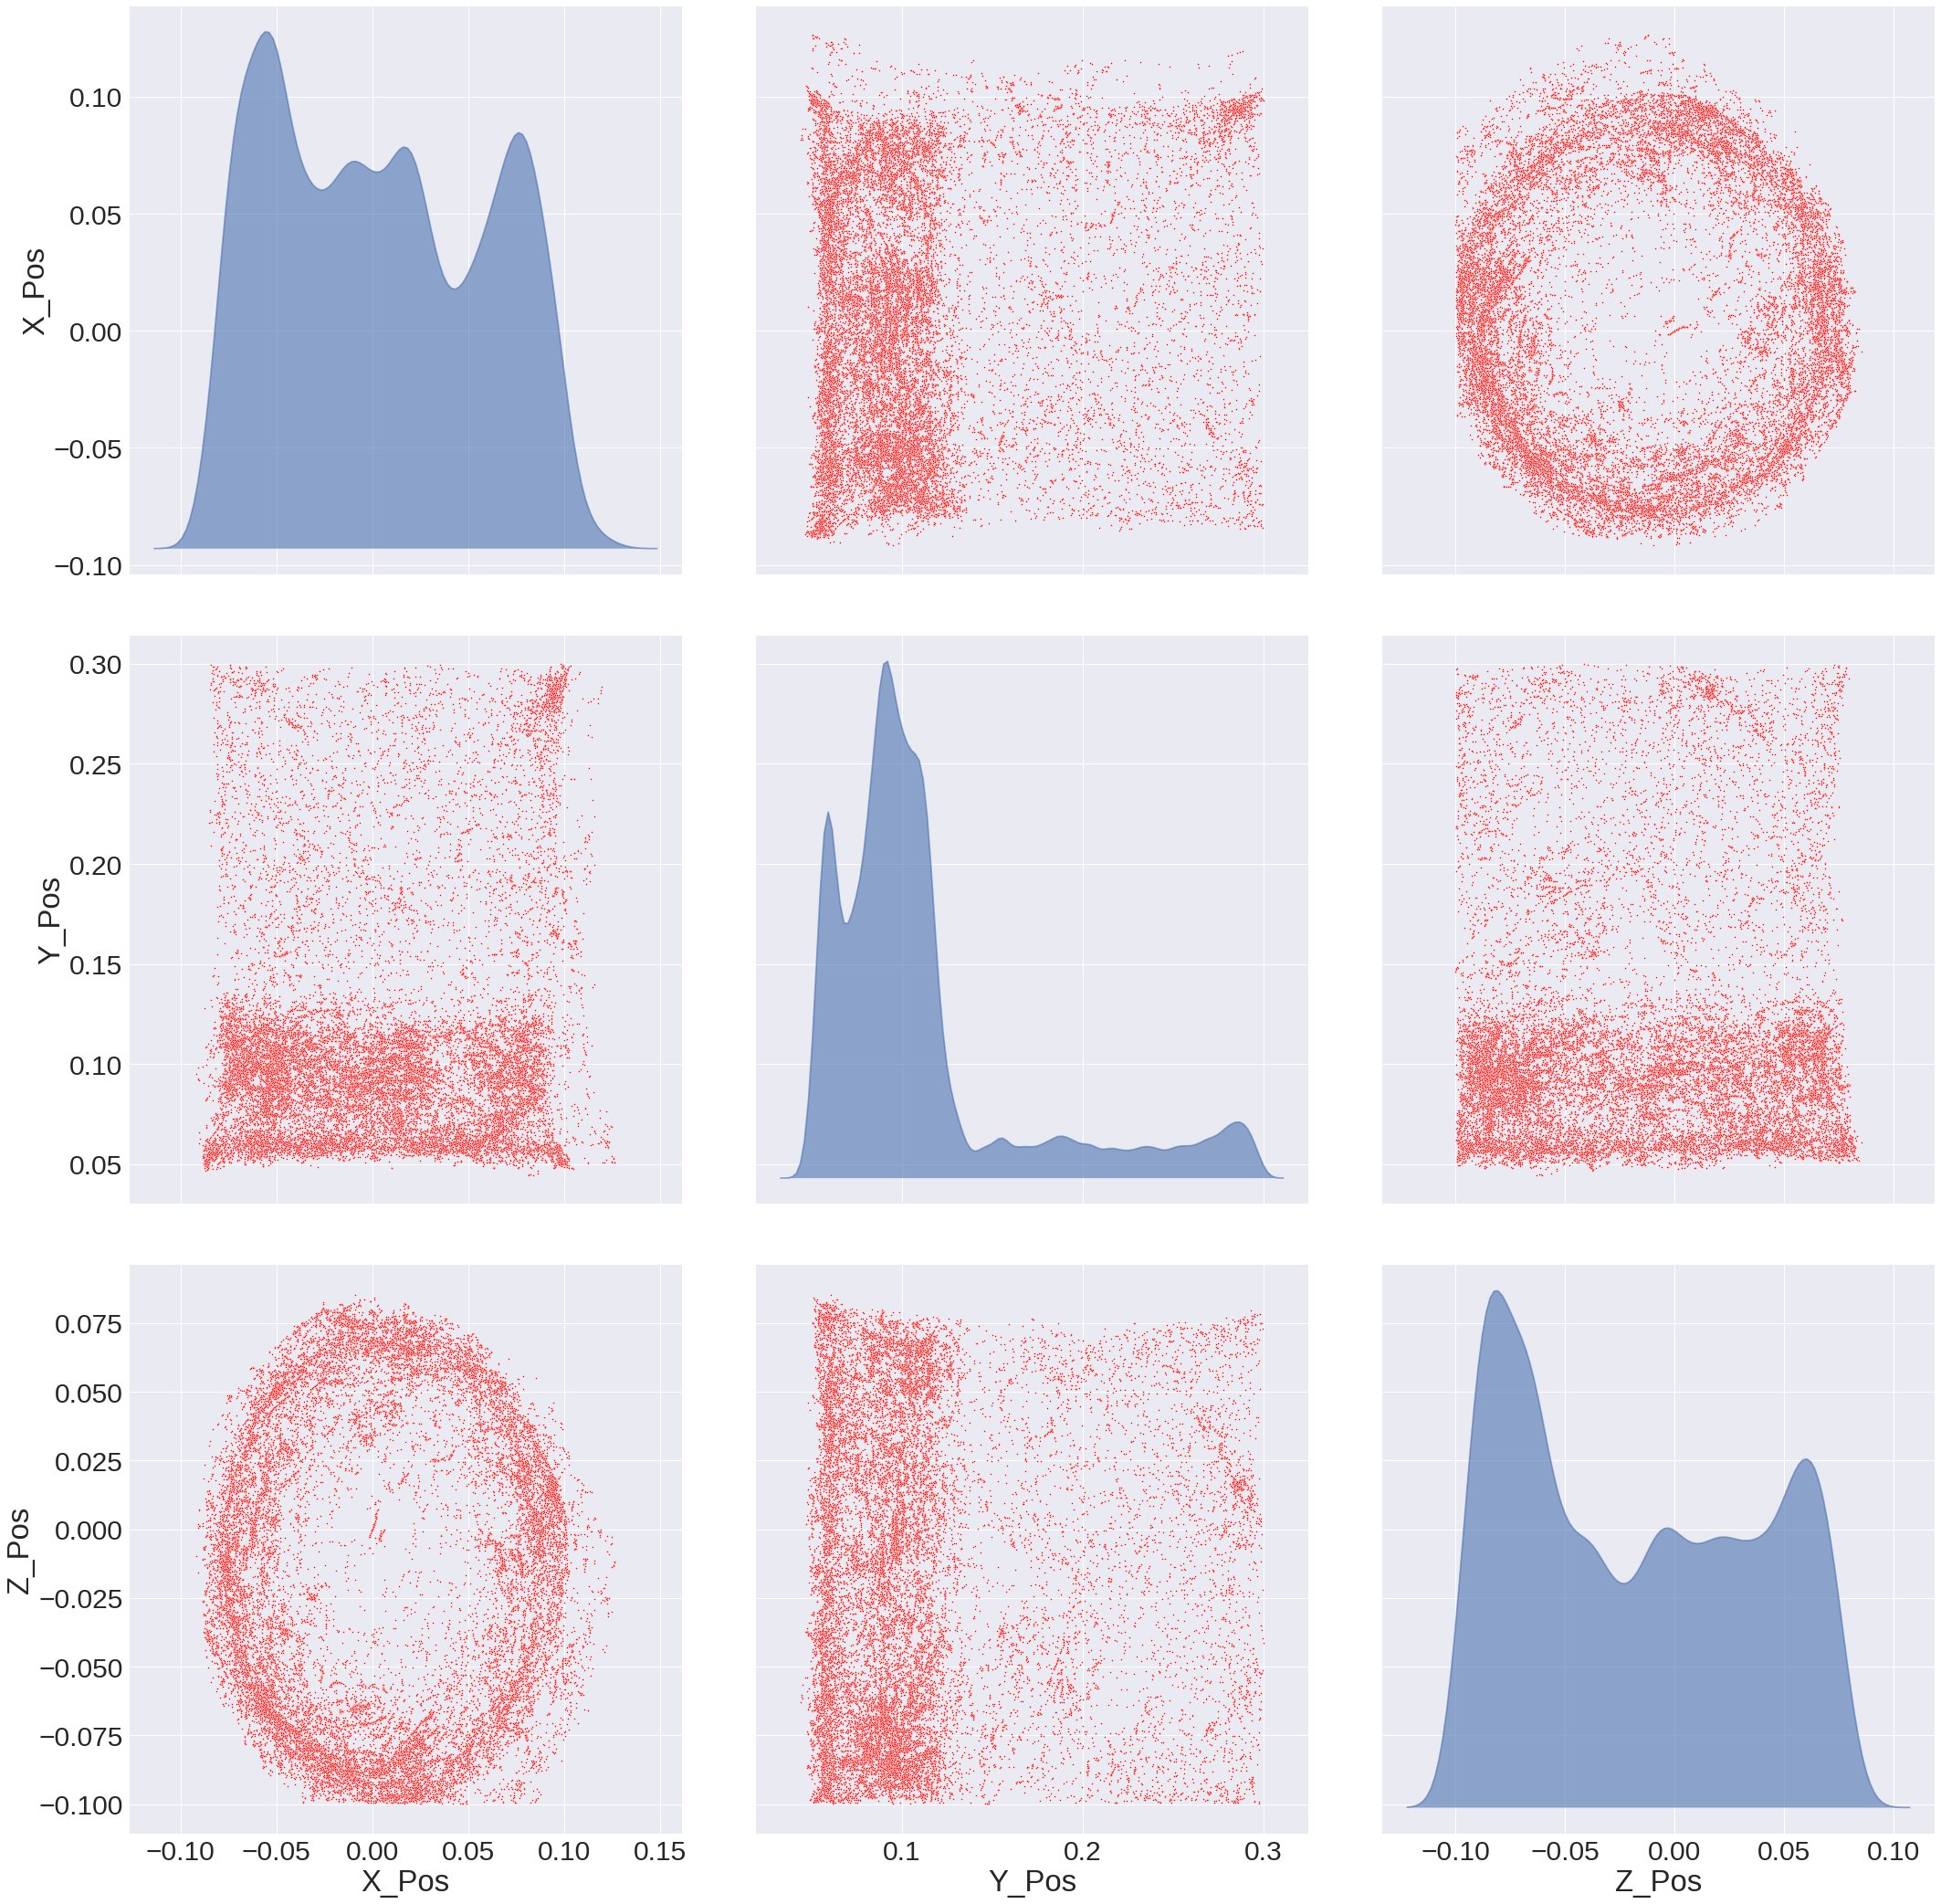

In [9]:
sns.set(font_scale=3)
g = sns.pairplot(rat.sample(30000), vars=['X_Pos', 'Y_Pos', 'Z_Pos'], plot_kws={'s':3, 'alpha':1, 'color':'red'},
                 diag_kws={'alpha':0.6, 'shade':True}, size=10, diag_kind='kde' );
# plt.title("Rat Position Distribution")
g.savefig('plots/pos_dist1.png', dpi=100)

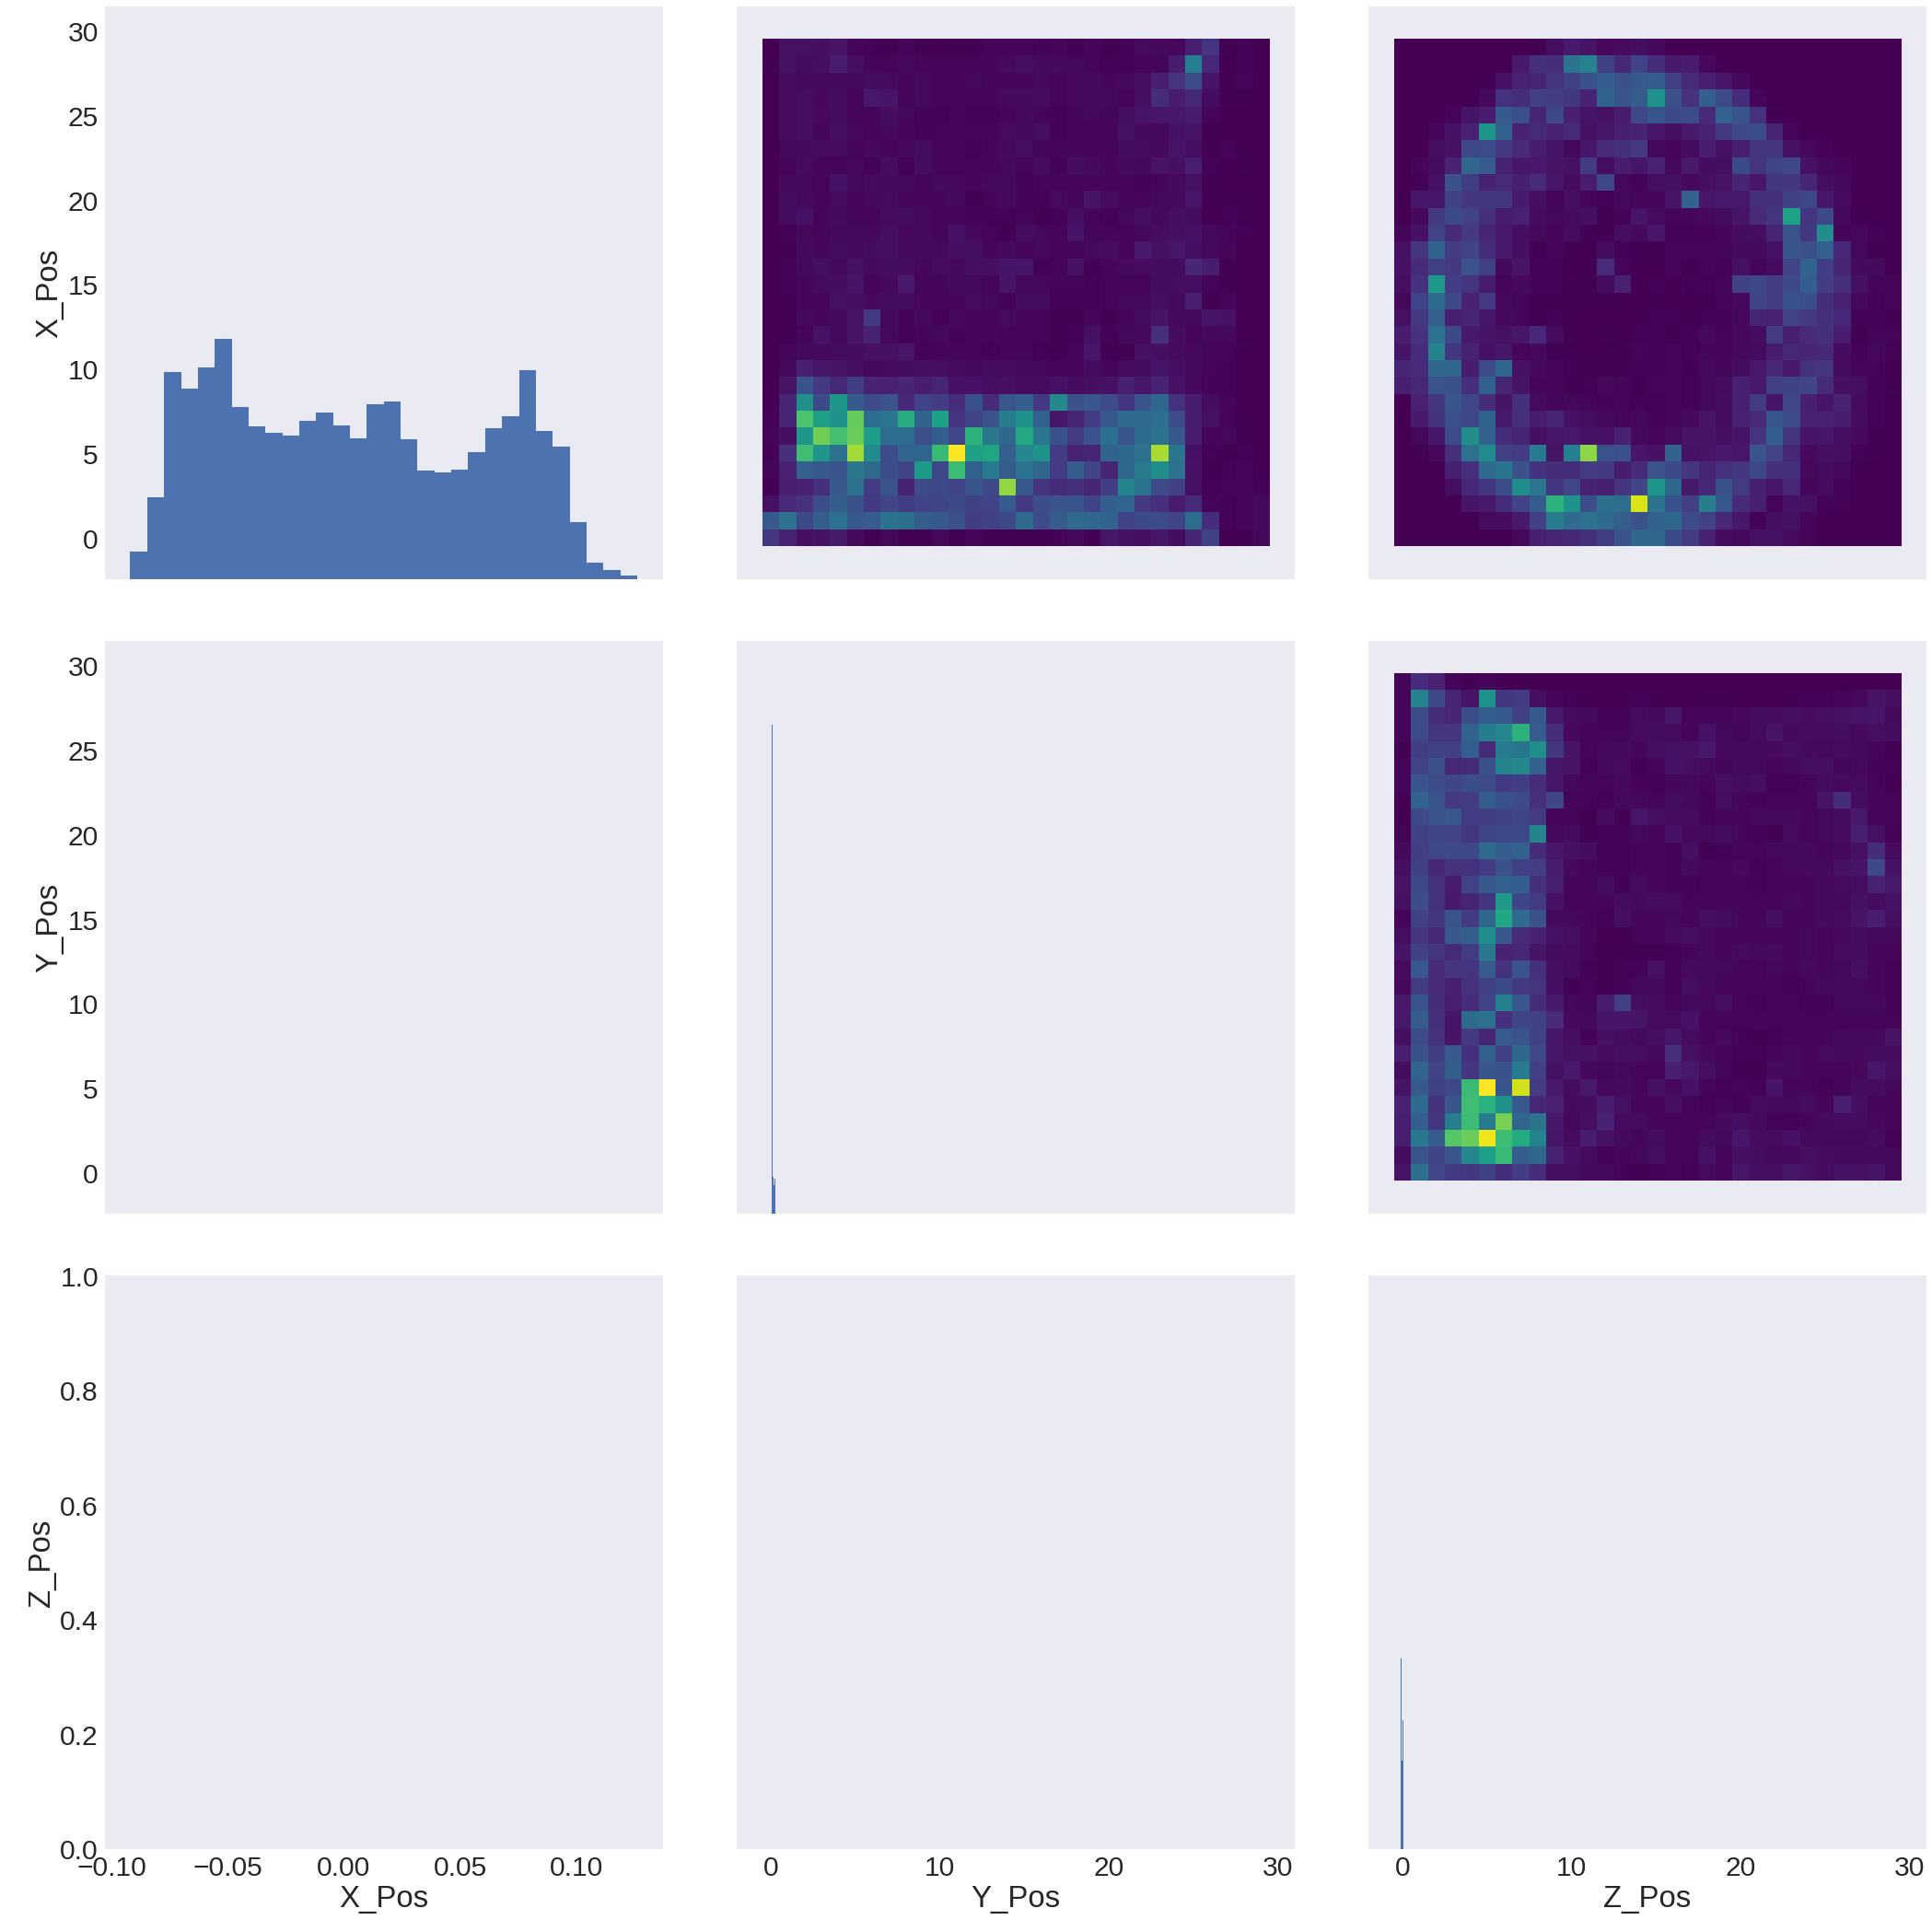

In [10]:
rcParams['grid.linewidth'] = 0

def make_heatmap(x, y, bins=20, cmap='viridis', norm=colors.Normalize(), **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower', norm=norm)
    
g = sns.PairGrid(data=rat, vars=['X_Pos', 'Y_Pos', 'Z_Pos'], size=10)
g.map_upper(make_heatmap, bins=30)
g.map_diag(plt.hist, bins=30)
g.savefig('plots/pos_dist2.png', dpi=300)

rcParams['grid.linewidth'] = 1

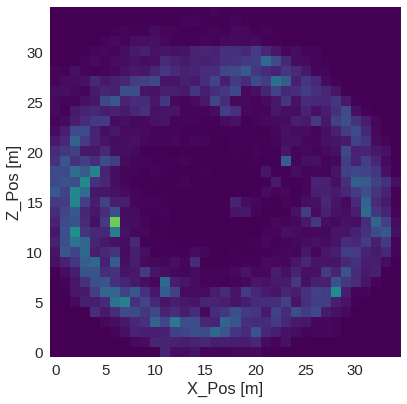

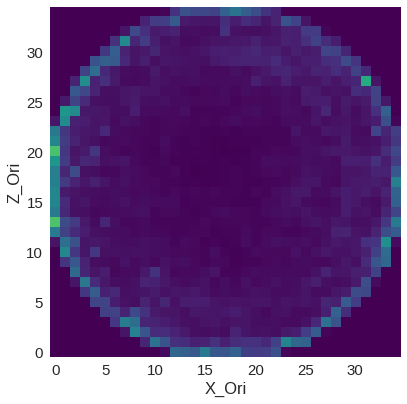

In [11]:
sns.set(font_scale=1.5)
rcParams['grid.linewidth'] = 0


g = sns.FacetGrid(data=rat, size=6)
g.map(make_heatmap,'X_Pos','Z_Pos', bins=35)
g.set_ylabels('Z_Pos [m]')
g.set_xlabels('X_Pos [m]')
g.savefig('plots/pos_dist2.png', dpi=300)


g = sns.FacetGrid(data=rat, size=6)
g.map(make_heatmap,'X_Ori','Z_Ori', bins=35)
g.savefig('plots/ori_dist2.png', dpi=300)


# rcParams['grid.linewidth'] = 1

### Orientation Distribution

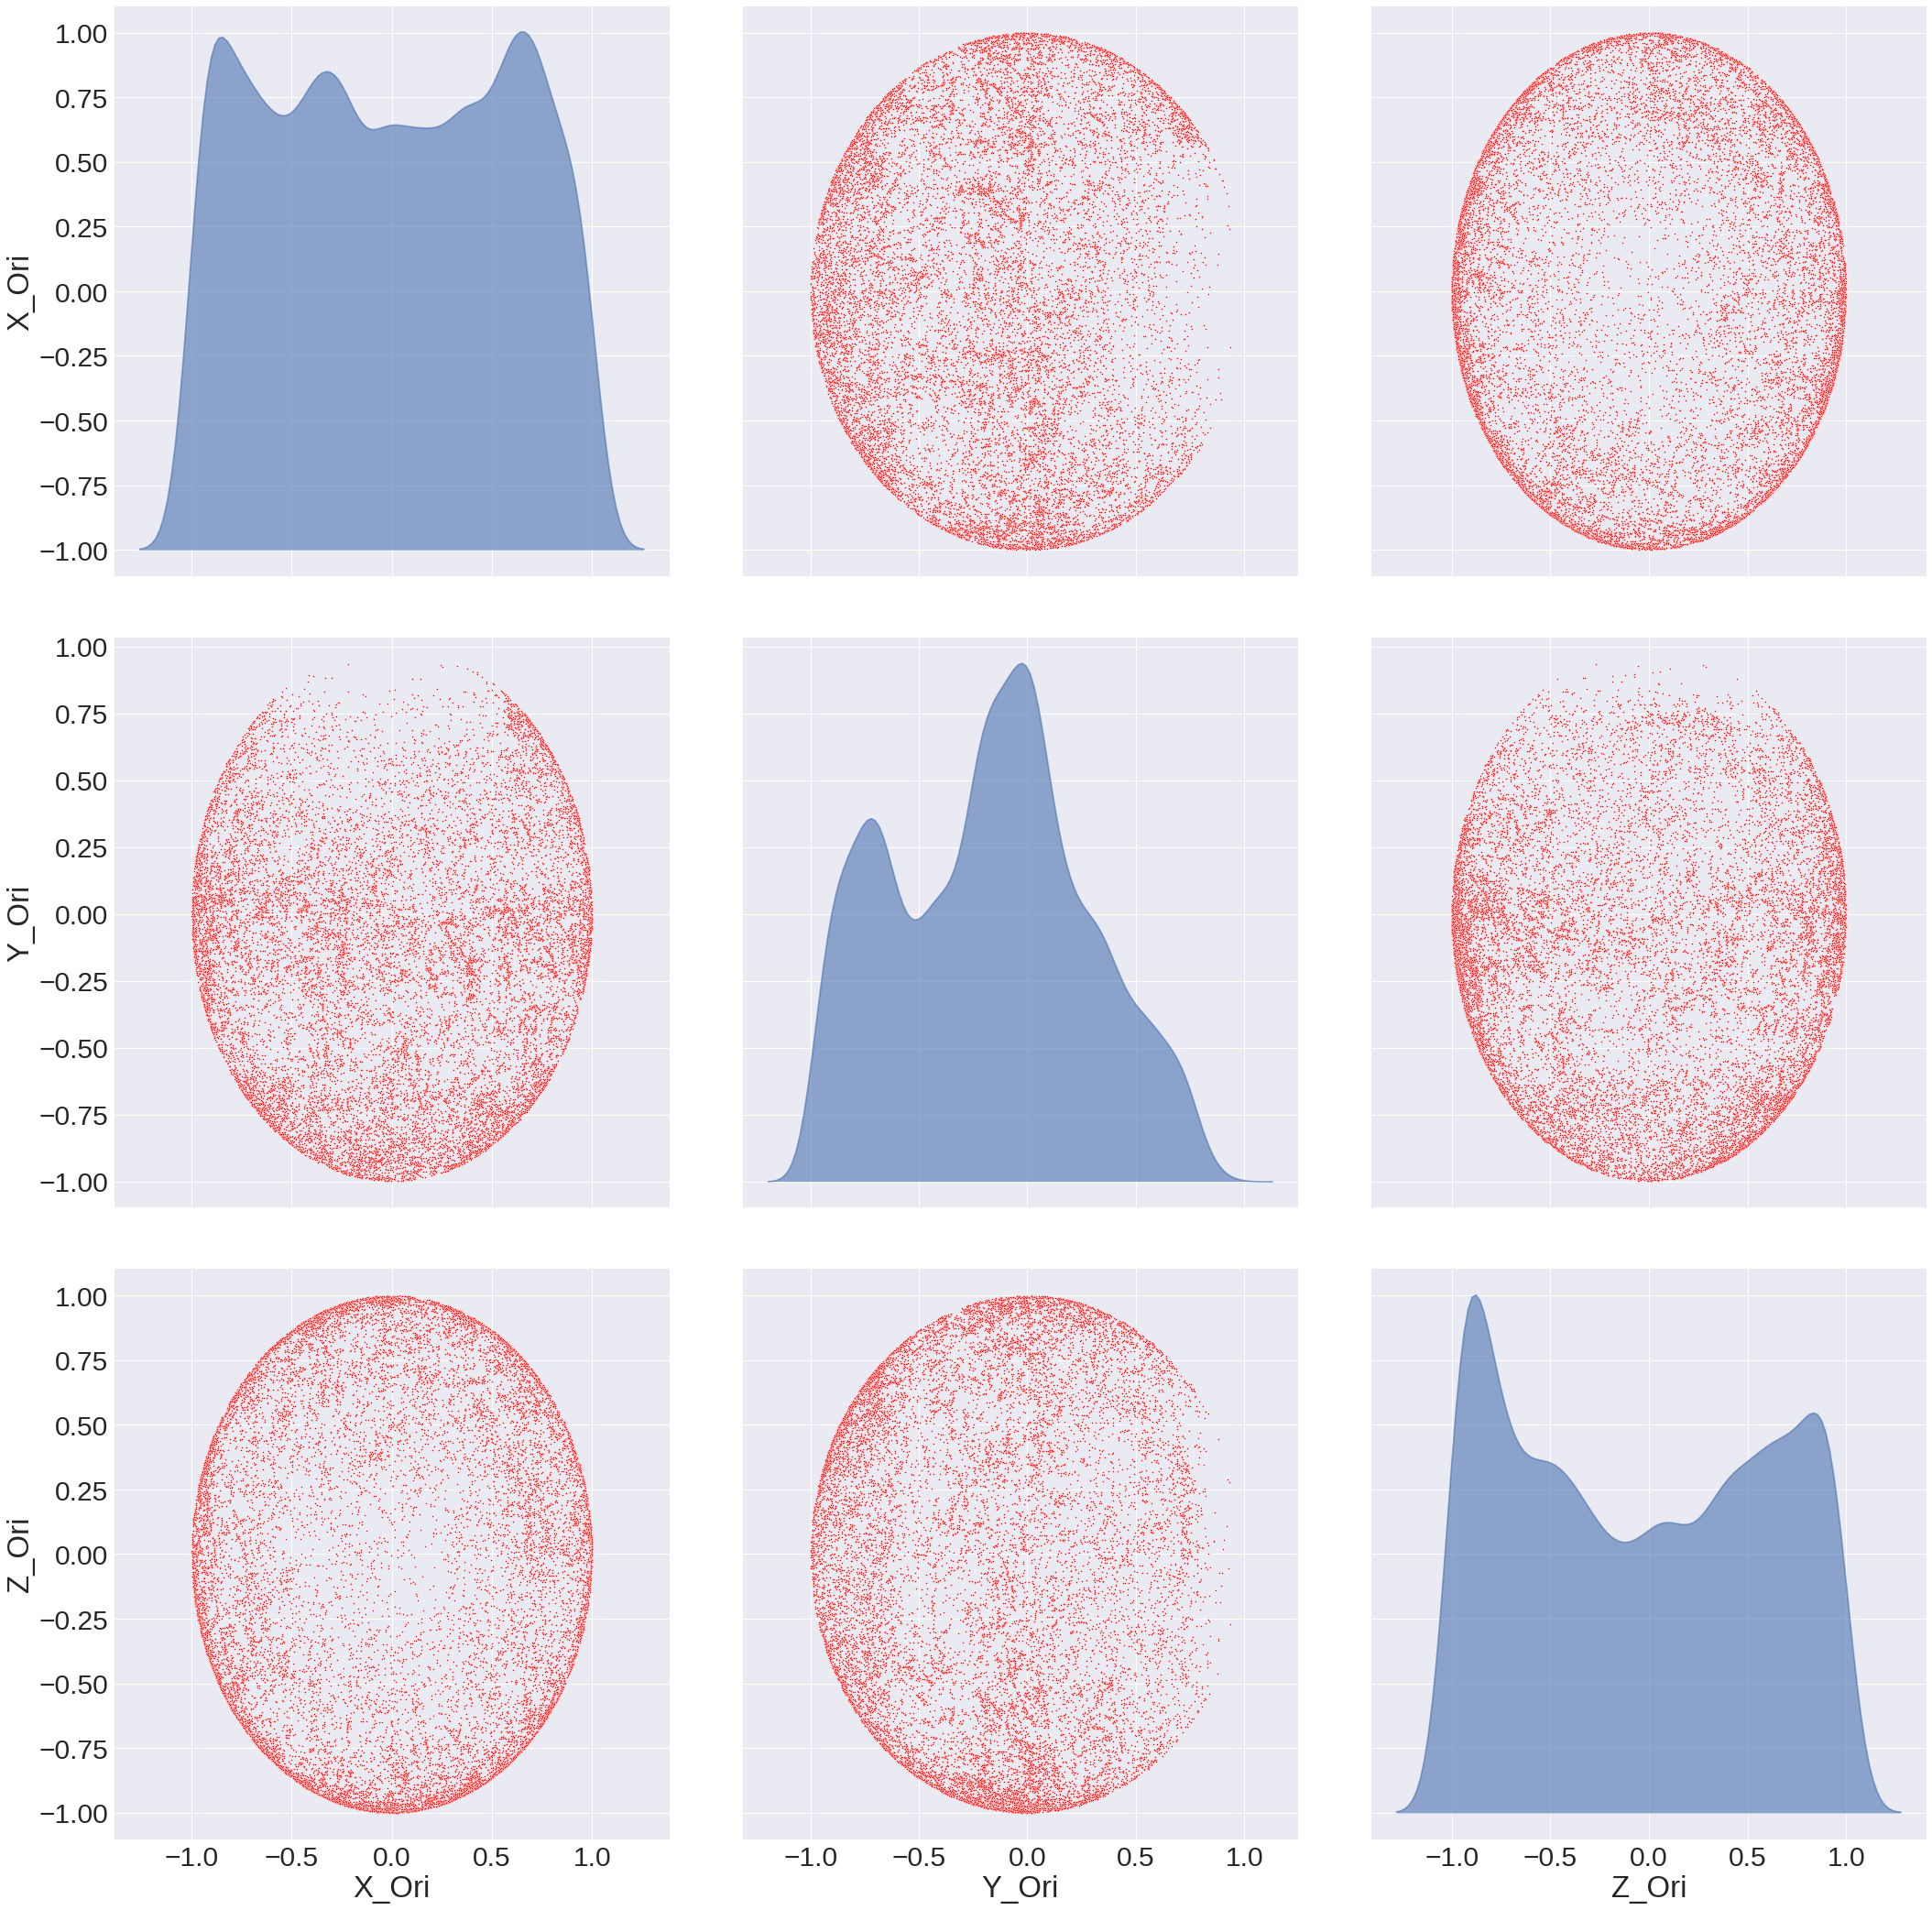

In [12]:
sns.set(font_scale=3)
# g = sns.pairplot(rat.sample(20000), vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={'s':3, 'alpha':0.7}, size=10);
g = sns.pairplot(rat.sample(20000), vars=['X_Ori', 'Y_Ori', 'Z_Ori'], plot_kws={'s':3, 'alpha':1, 'color':'red'},
                 diag_kws={'shade':True, 'alpha':0.6}, size=10, diag_kind='kde' );

# plt.title("Rat Orientation Distribution");
g.savefig('plots/ori_dist1.png', dpi=100)

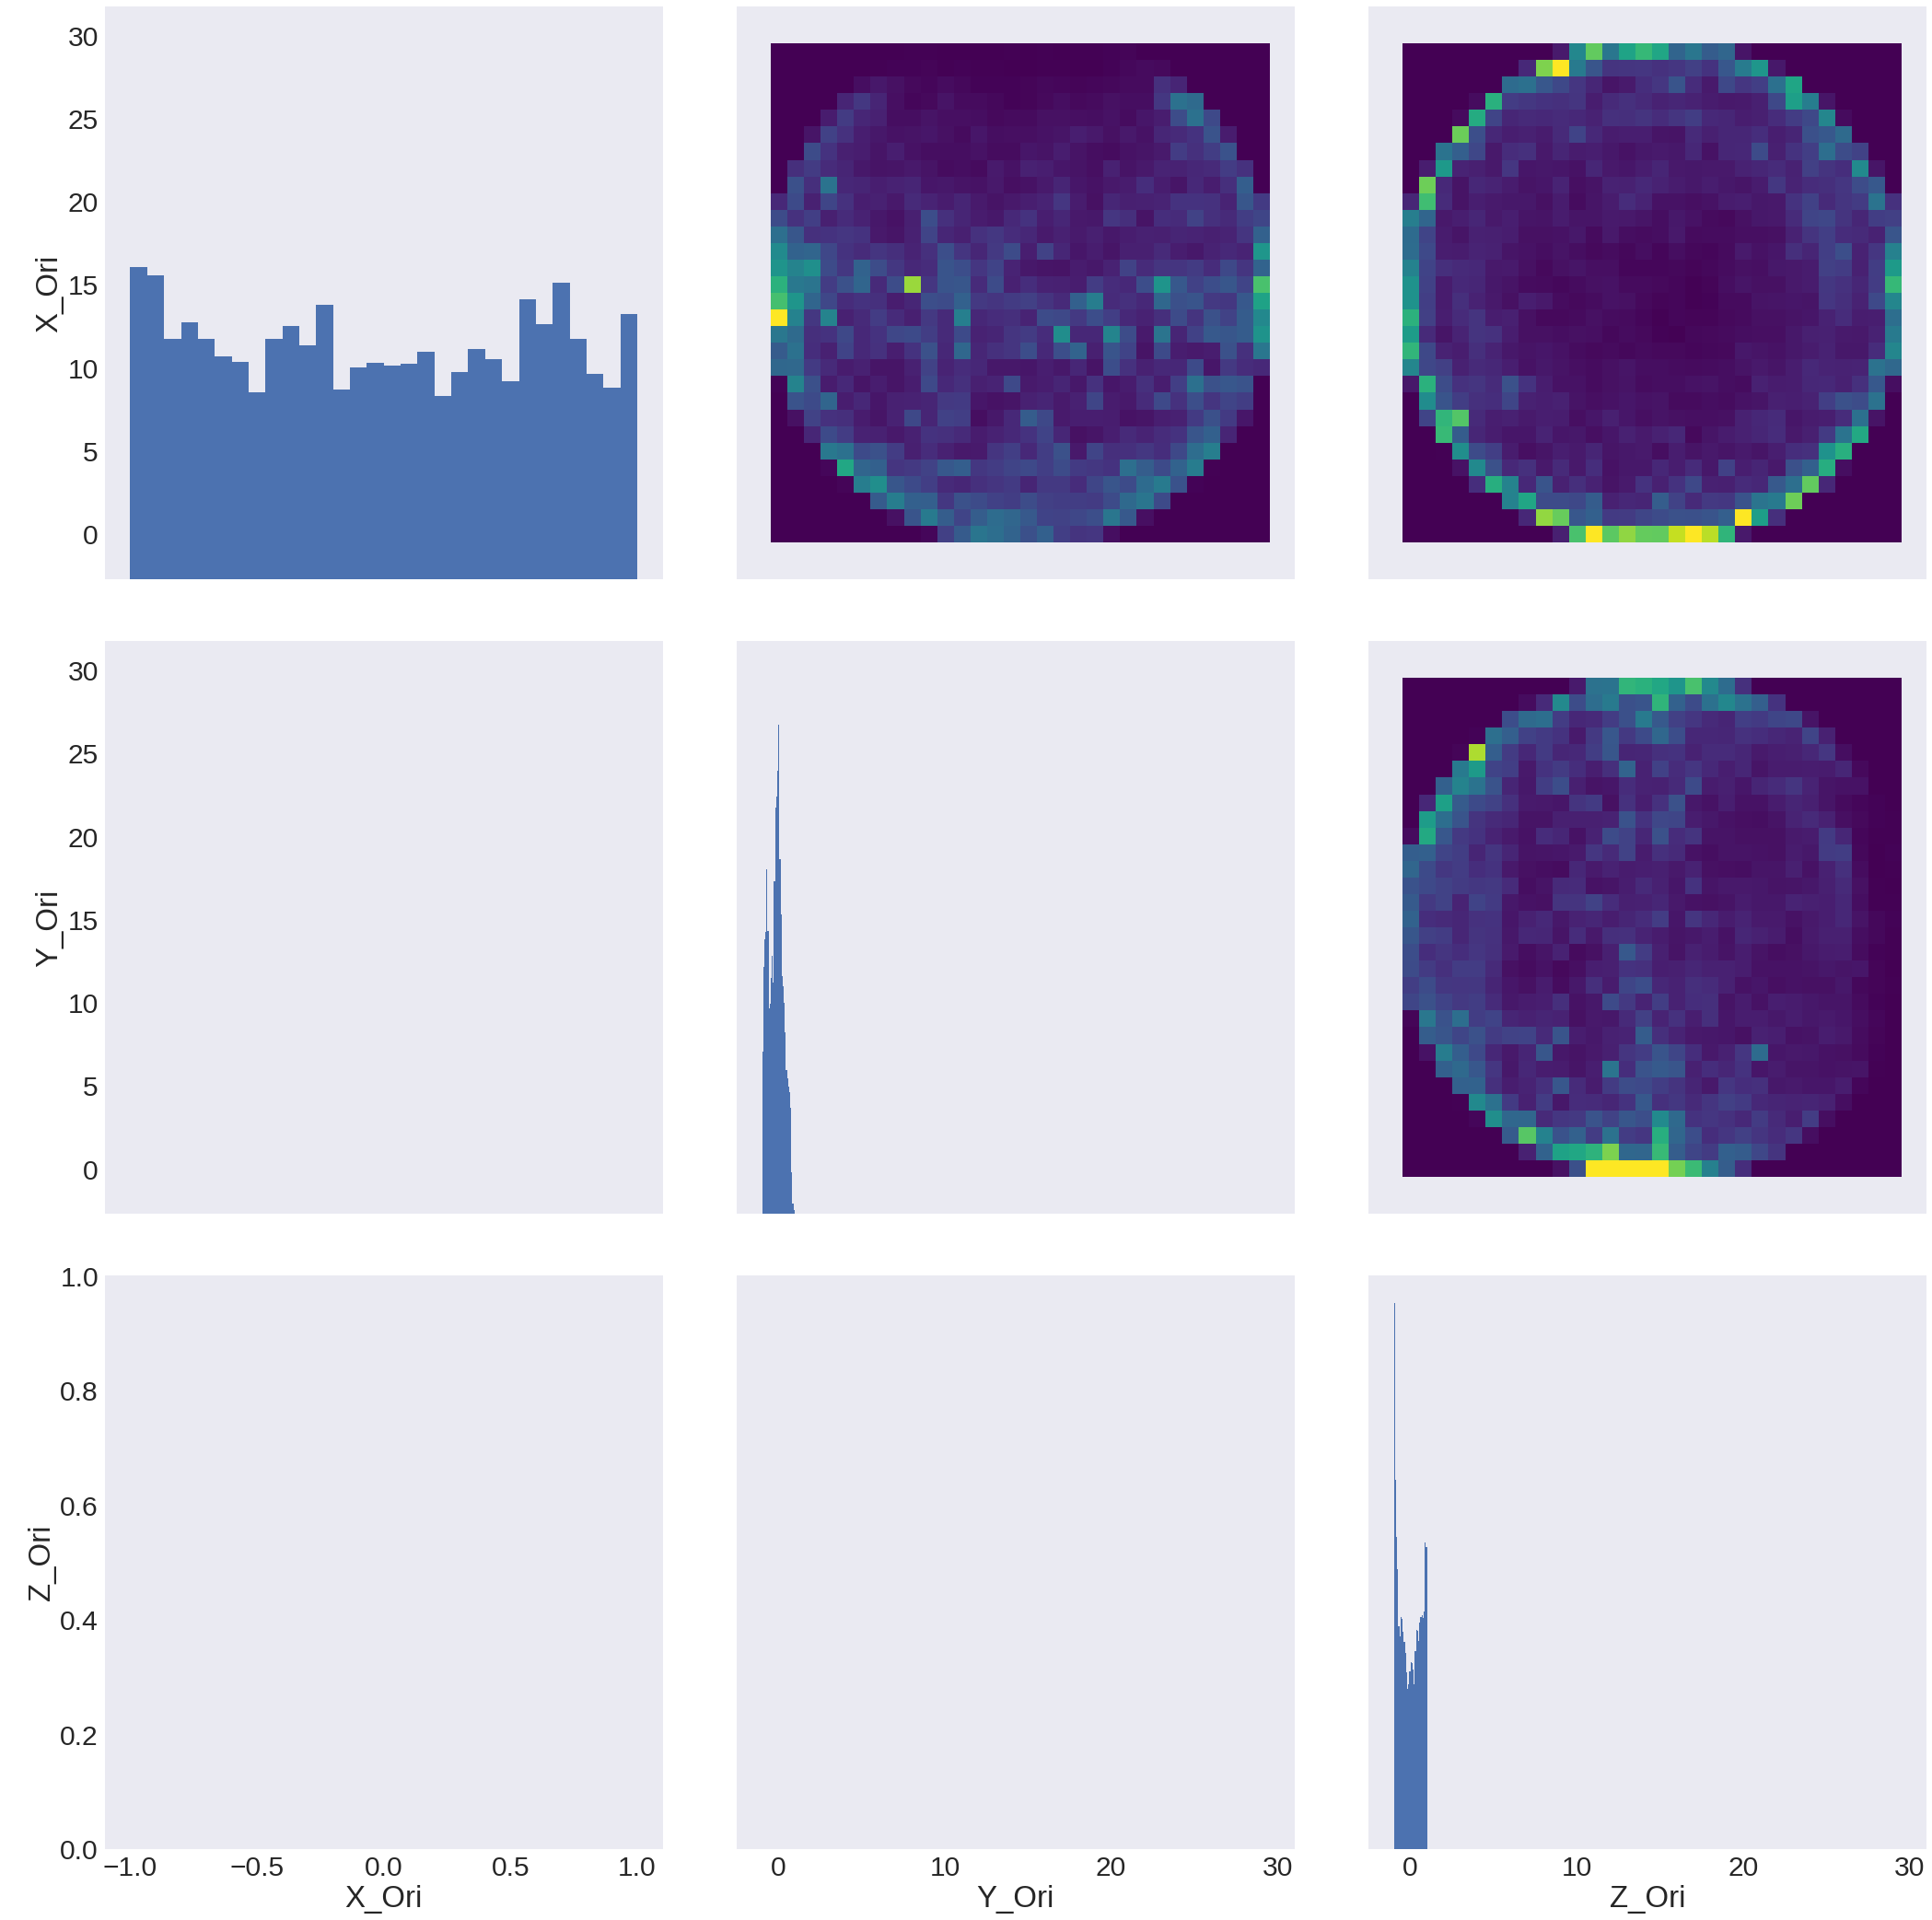

In [13]:
rcParams['grid.linewidth'] = 0

def make_heatmap(x, y, bins=20, cmap='viridis', norm=colors.Normalize(), **kwargs):
    hist = np.histogram2d(x, y, bins=bins)[0]
    return plt.imshow(hist, cmap=cmap, origin='lower', norm=norm)
    
g = sns.PairGrid(data=rat, vars=['X_Ori', 'Y_Ori', 'Z_Ori'], size=10)
g.map_upper(make_heatmap, bins=30)
g.map_diag(plt.hist, bins=30)

g.savefig('plots/ori_dist2.png', dpi=300)
rcParams['grid.linewidth'] = 1


### Orientation and Position one plot

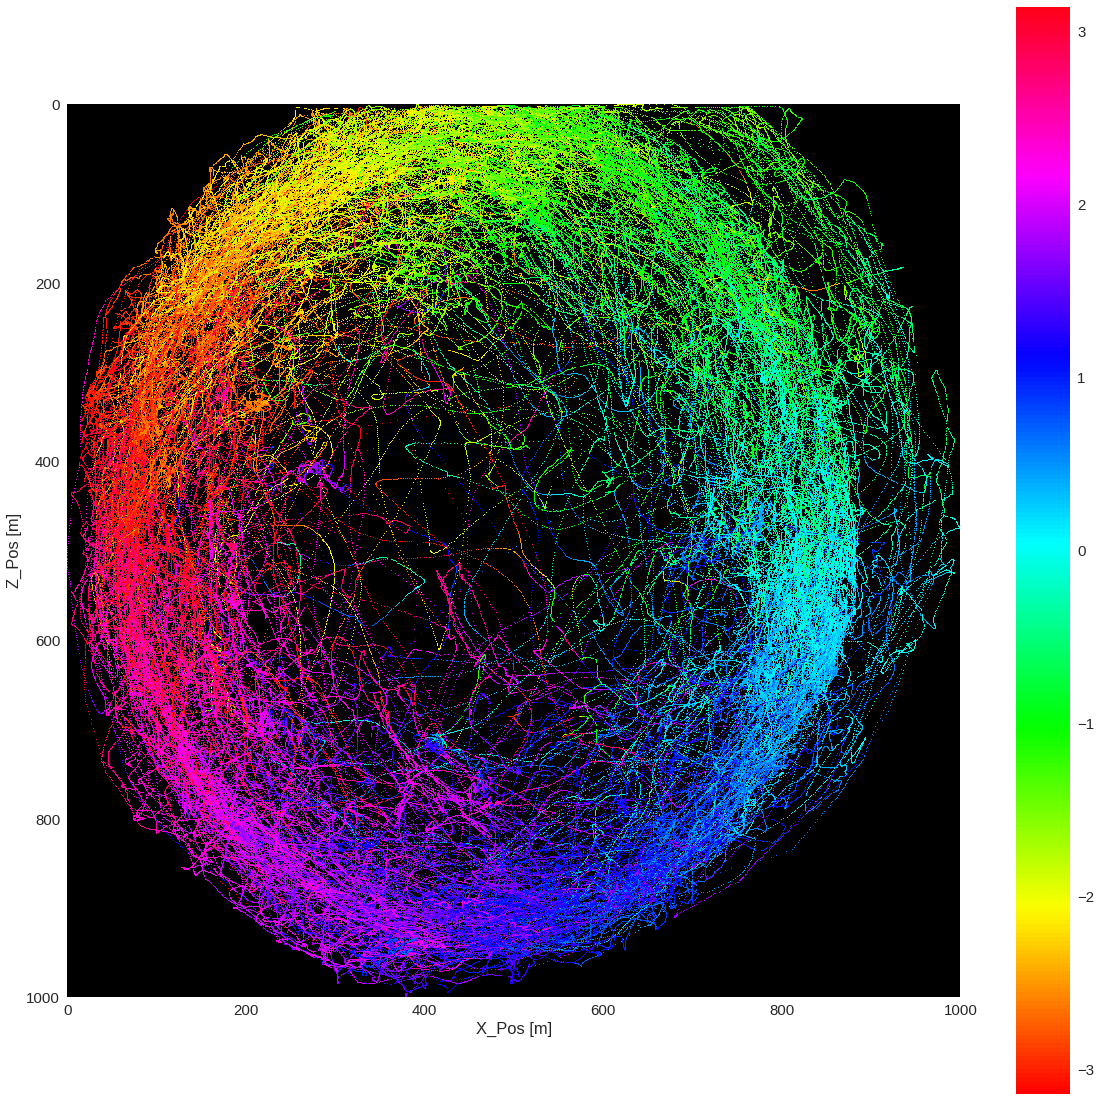

In [40]:
rcParams['grid.linewidth'] = 0

cvs = ds.Canvas(plot_height=1000, plot_width=1000)
agg_z =cvs.points(source=rat, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=rat, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(20, 20))
plt.imshow(theta, cmap=cm.hsv);

plt.colorbar()
plt.xlabel('X_Pos [m]')
plt.ylabel('Z_Pos [m]')

plt.savefig('plots/ori_pos.png', dpi=200)
rcParams['grid.linewidth'] = 1

## Data Filtering

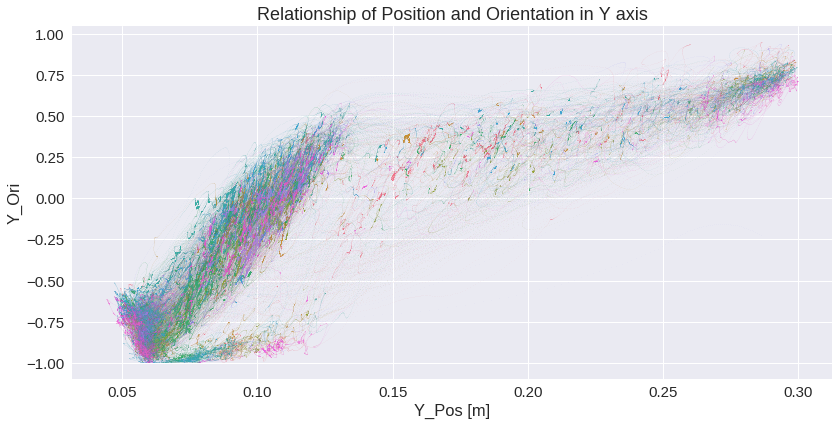

In [34]:
# scatter between orientation and position
sns.set(font_scale=1.5)

g = sns.FacetGrid( data=rat, size=6, aspect=2, hue='session_id');
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);
g.set_xlabels('Y_Pos [m]')
plt.title("Relationship of Position and Orientation in Y axis");

g.savefig('plots/ori_posY.png', dpi=300)

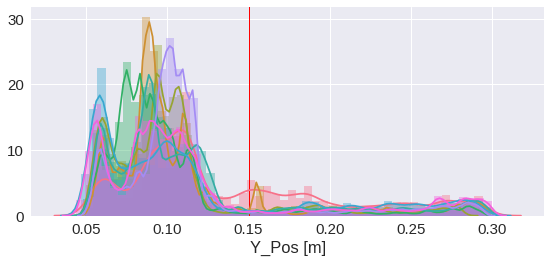

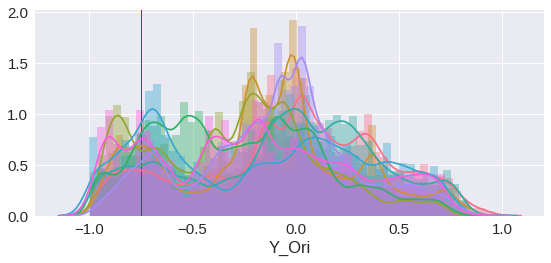

In [42]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(hue='session_id', data=rat, size=4, aspect=2)
g.map(plt.axvline, x=0.15, alpha=1, linewidth=1, color='red');
g.map(sns.distplot, 'Y_Pos');
g.set_xlabels('Y_Pos [m]')


g.savefig('plots/filter1.png', dpi=300)

# distribution per experiment + filetered lines
g = sns.FacetGrid(hue='session_id', data=rat, size=4, aspect=2)
g.map(plt.axvline, x=-0.75, alpha=1, linewidth=1, color='red');
g.map(sns.distplot, 'Y_Ori');
g.savefig('plots/filter2.png', dpi=300)

g = sns.FacetGrid(hue='session_id', data=rat, size=4, aspect=2)#, hue_order=[4,5])
g.map(plt.axvline, x=0.07, alpha=1, linewidth=1, color='red');
g.map(sns.distplot, 'Y_Pos');
g.set_xlabels('Y_Pos [m]')

g.savefig('plots/filter3.png', dpi=300)

In [36]:
# scatter between orientation and position
sns.set(font_scale=1.5)
rat_f = rat[rat.Filtered==1]
g = sns.FacetGrid( data=rat_f, size=6, aspect=2, hue='session_id');
g.map(plt.scatter, "Y_Pos", "Y_Ori", alpha=0.1, s=0.1);
plt.title("Filtered Relationship of Position and Orientation in Y axis");
g.set_xlabels('Y_Pos [m]')

g.savefig('plots/ori_posY_filt.png', dpi=300)

## Example experiment plot

In [18]:
sns.set(font_scale=1.5)
dfevent1 = stim[stim['session_id']==0]
g = sns.FacetGrid(dfevent1, size=8, aspect=2)
# g = g.map(plt.plot, "Time", "speed", "Time", "visibxle")
g = g.map(plt.plot, "Time", "visible", color='green')
g = g.map(plt.plot, "Time", "speed")

g.add_legend()
g.set_ylabels('Event Velocity [deg/sec]')
g.set_xlabels('Time [sec]')
plt.title("Event Velocities of Experiment 0");
g.savefig('plots/event.png', dpi=300)

## Velocity Plots

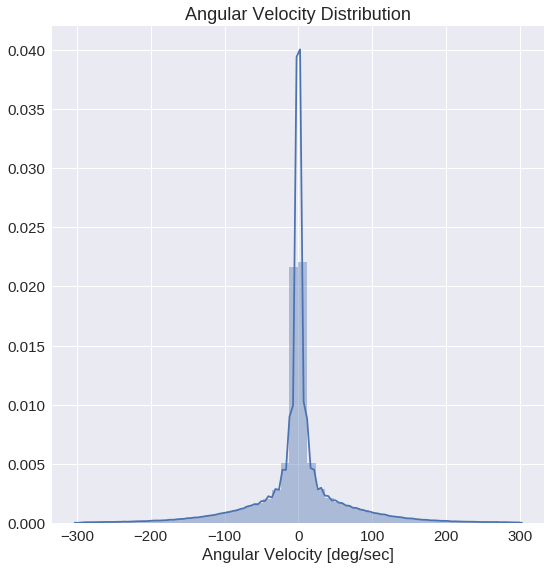

In [19]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(rat_v, size=8)
g = g.map(sns.distplot, "U") 

plt.title("Angular Velocity Distribution");
g.set_xlabels('Angular Velocity [deg/sec]')
g.savefig('plots/angU_velo.png', dpi=300)  


In [20]:
sns.set(font_scale=1.5)
mask =  (rat_vs.session_id == 0)
g = sns.FacetGrid(rat_vs[mask], size=8, aspect=2)
g = g.map(plt.plot,"Time", "U") 

g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')
plt.title("Velocity in Experiment 0");
g.savefig('plots/vel_exp1.png', dpi=300)

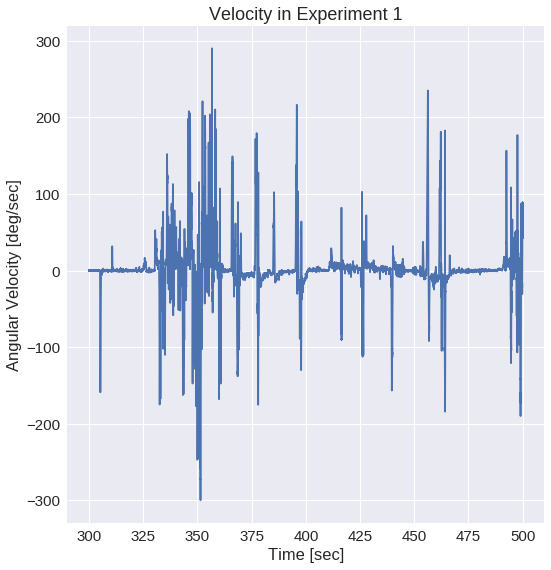

In [21]:
sns.set(font_scale=1.5)
mask =  (rat_vs.session_id == 1) & (rat_vs.Time > 300) & (rat_vs.Time < 500)
g = sns.FacetGrid(rat_vs[mask], size=8)
g = g.map(plt.plot,"Time", "U") 

g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')
plt.title("Velocity in Experiment 1");

g.savefig('plots/vel_exp_short.png', dpi=300)

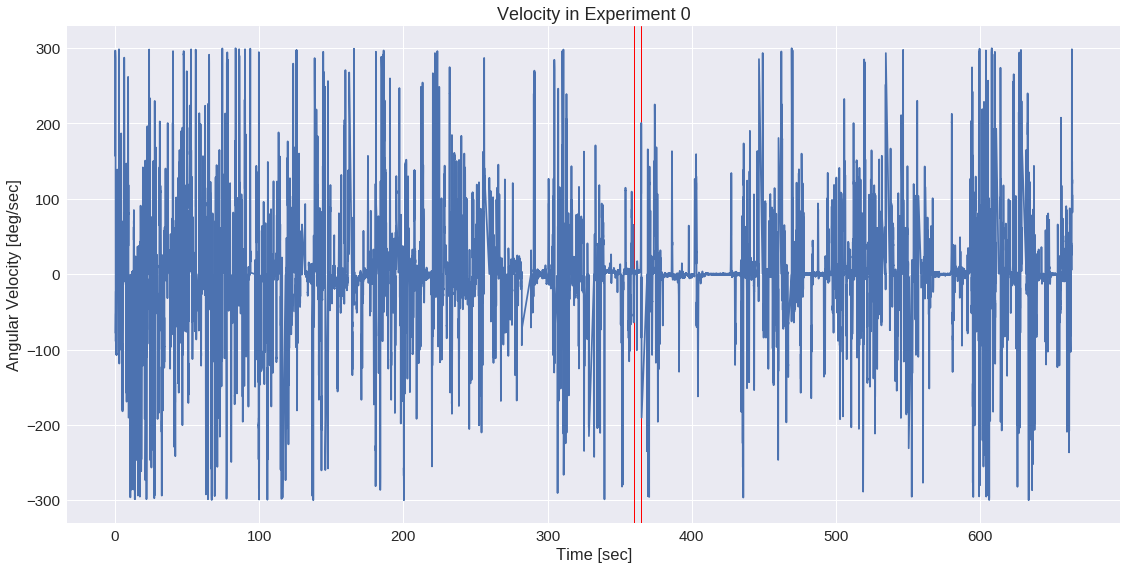

In [22]:
xmin, xmax = 360, 364.5

sns.set(font_scale=1.5)
mask =  (rat_vs.session_id == 0)
g = sns.FacetGrid(rat_vs[mask], size=8, aspect=2)
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g = g.map(plt.plot,"Time", "U") 

g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')

plt.title("Velocity in Experiment 0");
g.savefig('plots/vel_exp2.png', dpi=300)

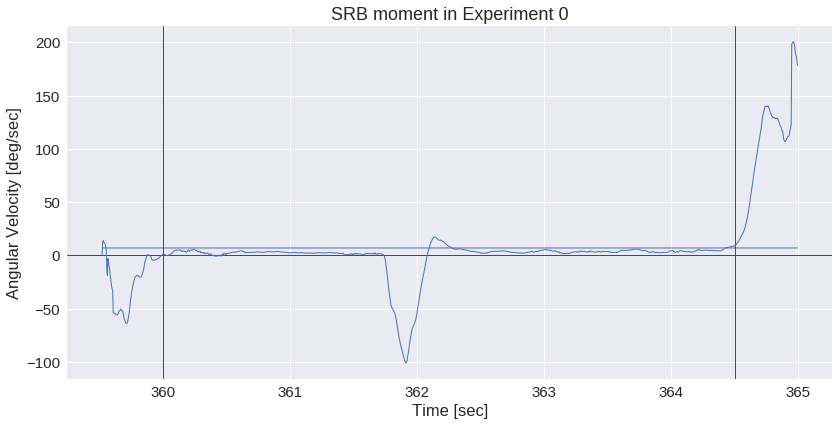

In [23]:
## example velocity
sns.set(font_scale=1.5)
a, b = 359.5, 365
mask = (rat_vs.Filtered == 1) & (rat_vs.session_id == 0) & (rat_vs['Time']>a) & (rat_vs['Time']<b)

g = sns.FacetGrid(data=rat_vs[mask], size=6, aspect=2)
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')


plt.title("SRB moment in Experiment 0");
g.savefig('plots/SRB_time_velo1.png', dpi=300)


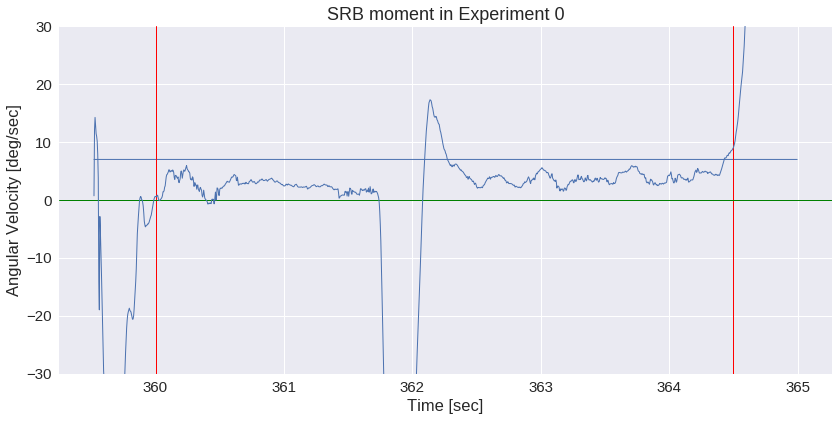

In [24]:
## example velocity
sns.set(font_scale=1.5)
a, b = 359.5, 365
mask = (rat_vs.Filtered == 1) & (rat_vs.session_id == 0) & (rat_vs['Time']>a) & (rat_vs['Time']<b)

g = sns.FacetGrid(data=rat_vs[mask], size=6, aspect=2, ylim=[-30, 30])
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')

plt.title("SRB moment in Experiment 0");
g.savefig('plots/SRB_time_velo2.png', dpi=300)


## Results

### Histograms of velocities 

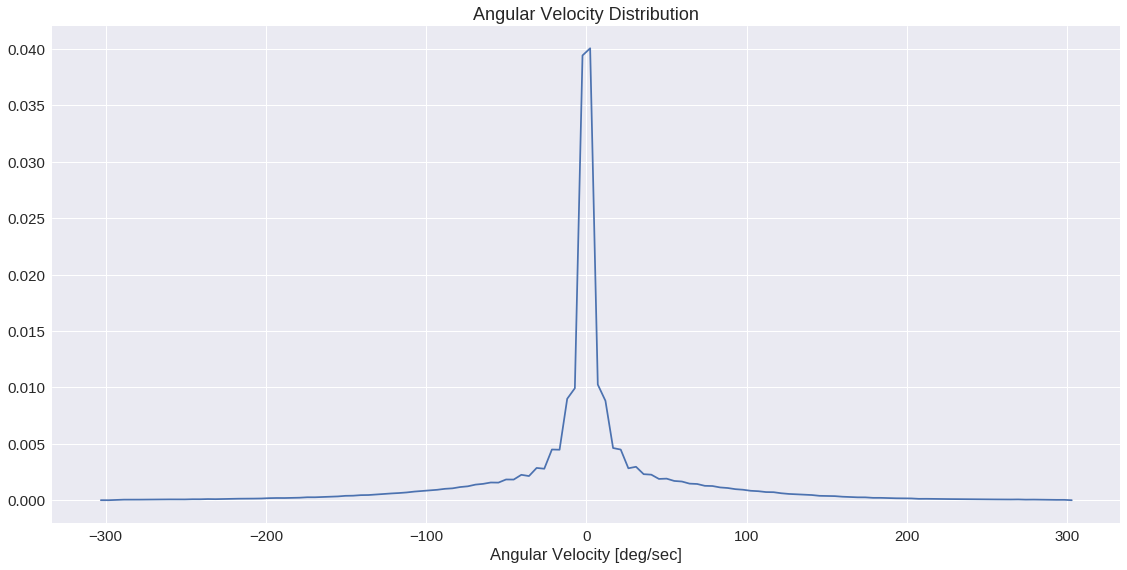

In [25]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(rat_vs, size=8, aspect=2)
g.map(sns.kdeplot, 'U')
g.set_xlabels('Angular Velocity [deg/sec]')

plt.title("Angular Velocity Distribution");
g.savefig('plots/angU_velo2.png', dpi=300)

In [26]:
rat_vs2 = rat_vs.rename(columns={'visible':'Stimulus visible', 'speed':'event velocity'})
mask = (np.abs(rat_vs2.U) >= 0) & (np.abs(rat_vs2.U) < 40)

g = sns.FacetGrid(data=rat_vs2[mask], hue='event velocity', col='Stimulus visible', size=7)
g.map(sns.kdeplot, 'U').add_legend()
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(plt.axvline, x=0, alpha=1, linewidth=1, color='black');

g.set_xlabels('Angular Velocity [deg/sec]')

g.savefig('plots/angU_velo_speed.png', dpi=300)


In [27]:
mask = (np.abs(rat_vs2.U) >= 0) & (np.abs(rat_vs2.U) < 40) & (rat_vs2['event velocity'] > 0) & (rat_vs2['Stimulus visible']==True)

g = sns.FacetGrid(data=rat_vs2[mask], hue='event velocity', size=7)
g.map(sns.kdeplot, 'U').add_legend()

g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(plt.axvline, x=0, alpha=1, linewidth=1, color='black');
g.set_xlabels('Angular Velocity [deg/sec]')

g.savefig('plots/angU_velo_speed_pos.png', dpi=300)


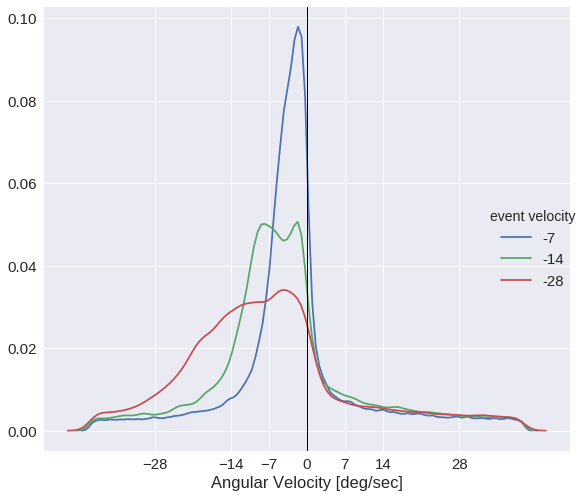

In [28]:
mask = (np.abs(rat_vs2.U) >= 0) & (np.abs(rat_vs2.U) < 40) & (rat_vs2['event velocity'] < 0) & (rat_vs2['Stimulus visible']==True)

g = sns.FacetGrid(data=rat_vs2[mask], hue='event velocity', size=7, hue_order=[-7, -14, -28])
g.map(sns.kdeplot, 'U').add_legend()
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(plt.axvline, x=0, alpha=1, linewidth=1, color='black');

g.set_xlabels('Angular Velocity [deg/sec]')

g.savefig('plots/angU_velo_speed_neg.png', dpi=300)

## Plots from SRB collection

## Distribition of velocities for each session

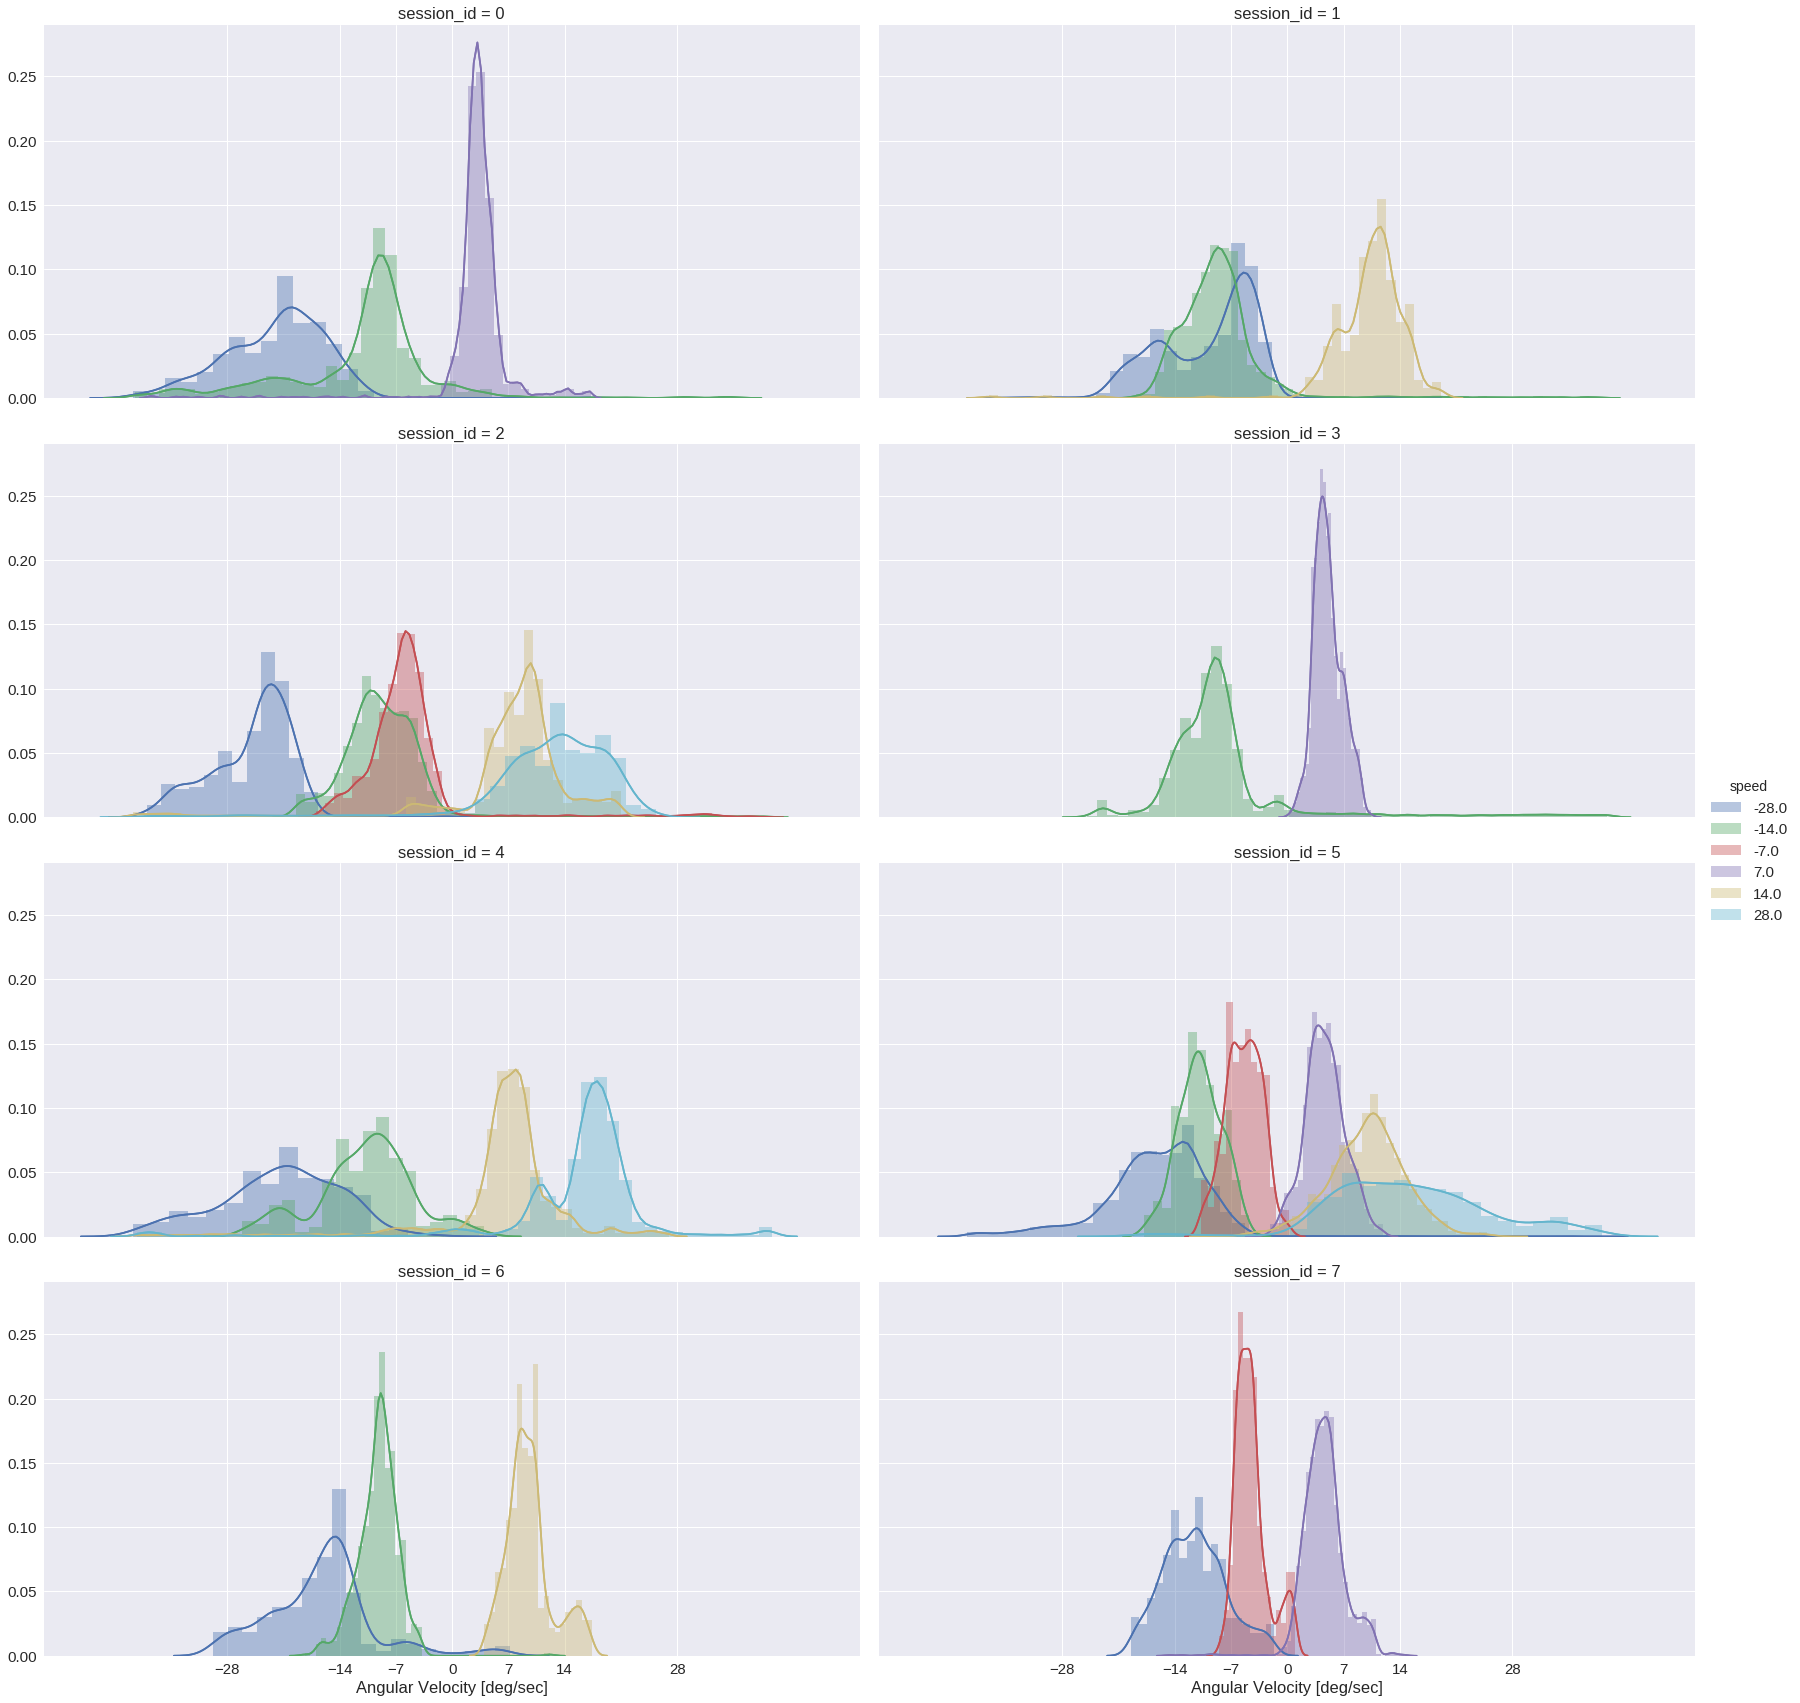

In [29]:
mask = np.abs(SRB.U) < 40
SRB_lim = SRB[mask]
g = sns.FacetGrid(data=SRB_lim, size=6, aspect=2, hue='speed', col='session_id', col_wrap=2);

g.map(sns.distplot, 'U');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.kdeplot, 'U').add_legend()
g.set_xlabels('Angular Velocity [deg/sec]')


/home/ateska/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


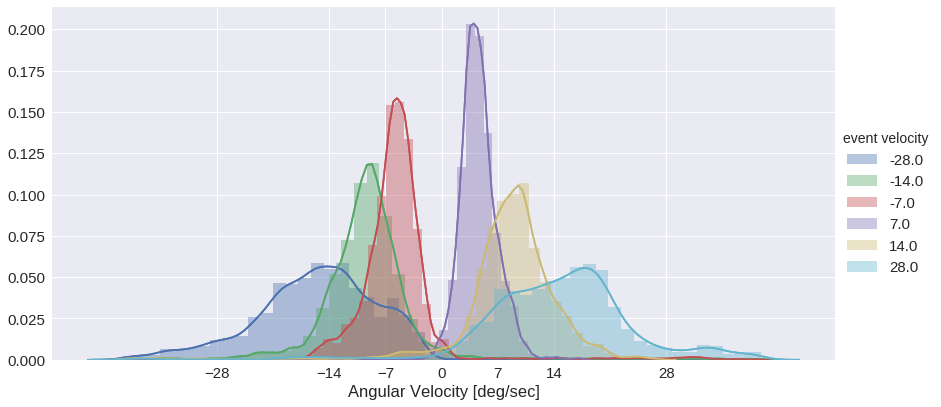

In [30]:
mask = np.abs(SRB.U) < 40
SRB_lim = SRB[mask]
SRB_lim.rename(inplace=True, columns={'speed':'event velocity'}) 
g = sns.FacetGrid(data=SRB_lim, size=6, aspect=2, hue='event velocity');

g.map(sns.distplot, 'U');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.kdeplot, 'U').add_legend()
g.set_xlabels('Angular Velocity [deg/sec]')

plt.savefig('plots/SRB.png', dpi=150)

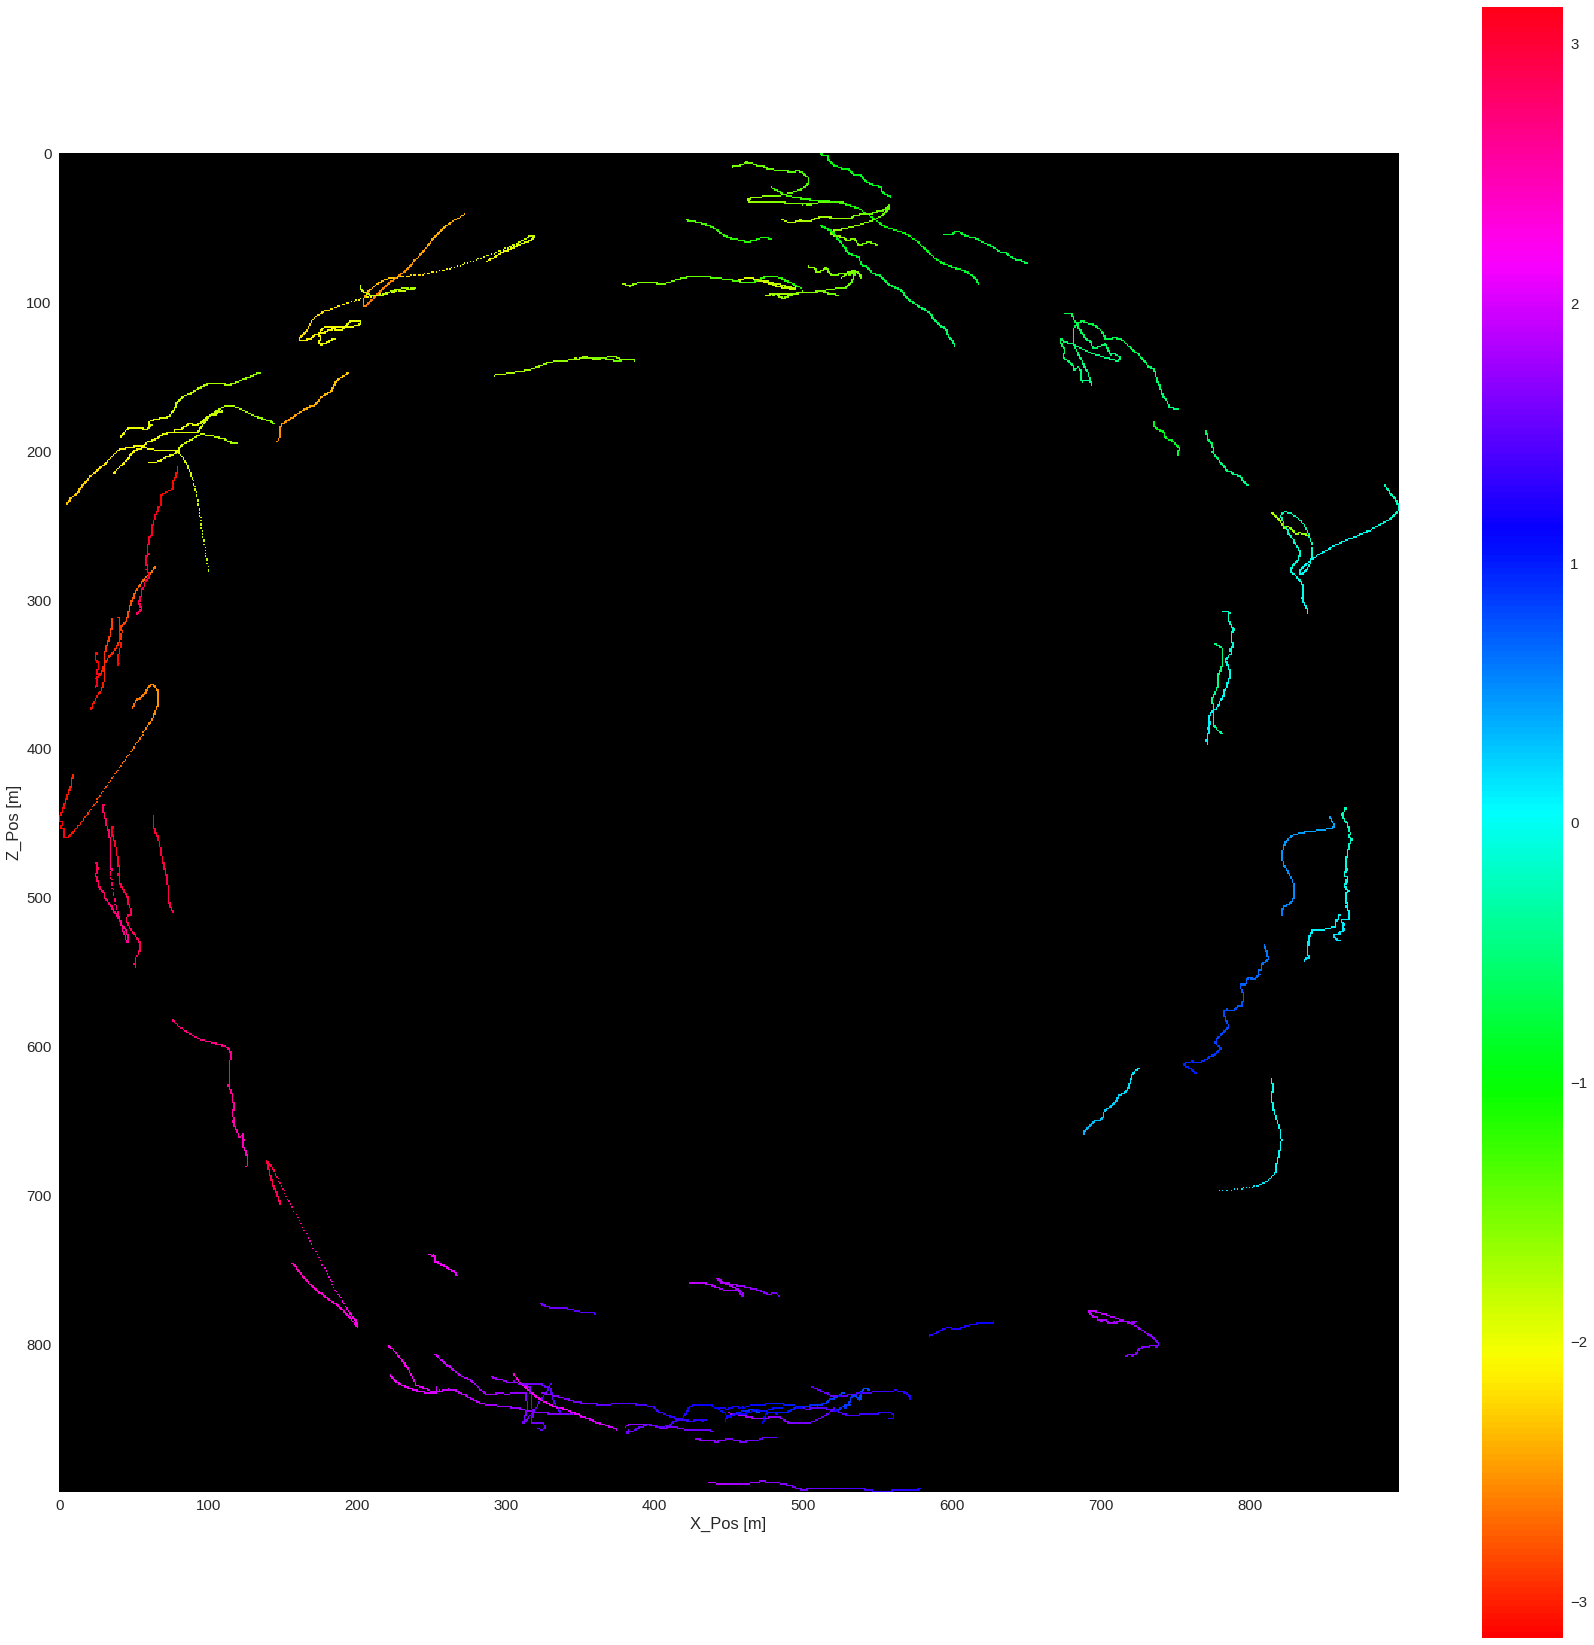

In [41]:
rcParams['grid.linewidth'] = 0

cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=SRB, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=SRB, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)
plt.xlabel('X_Pos [m]')
plt.ylabel('Z_Pos [m]')

plt.colorbar();

plt.savefig('plots/SRB_pos_ori.png', dpi=150)

rcParams['grid.linewidth'] = 1
